In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


### Content
* [Import Data](#1)
* [Data Cleaning](#2)
* [KNN](#3)
    * [Model Complexity](#4)
    * [Cross Validation](#5)
* [Decision Tree Classifier](#6)
* [Random Forest Classifier](#7)
* [Support Vector Classifier](#8)
* [Logistic Regression](#9)
* [Metrics](#10)
* [the end](#11)

<a id = "1"></a>
#### Import Data

In [2]:
training_df = pd.read_csv("sample.csv")
testing_df = pd.read_csv("Trial.csv")
training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [4]:
testing_df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [5]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


There are 4920 samples and 134 features in the dataset. First I have to dive into deeper of the data so I can completely understand it. The data is clean and balanced so I dont need to handle with missing values, outliers etc. Just a single 
column will be dropped below stages of this kernel

In [6]:
# display 30-60. indices of columns. 
training_df.columns[30:60]

Index(['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine',
       'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
       'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
       'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements'],
      dtype='object')

In [7]:
# all of these are encoded data and types are integer.
training_df["indigestion"]

0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Name: indigestion, Length: 4920, dtype: int64

In [8]:
training_df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

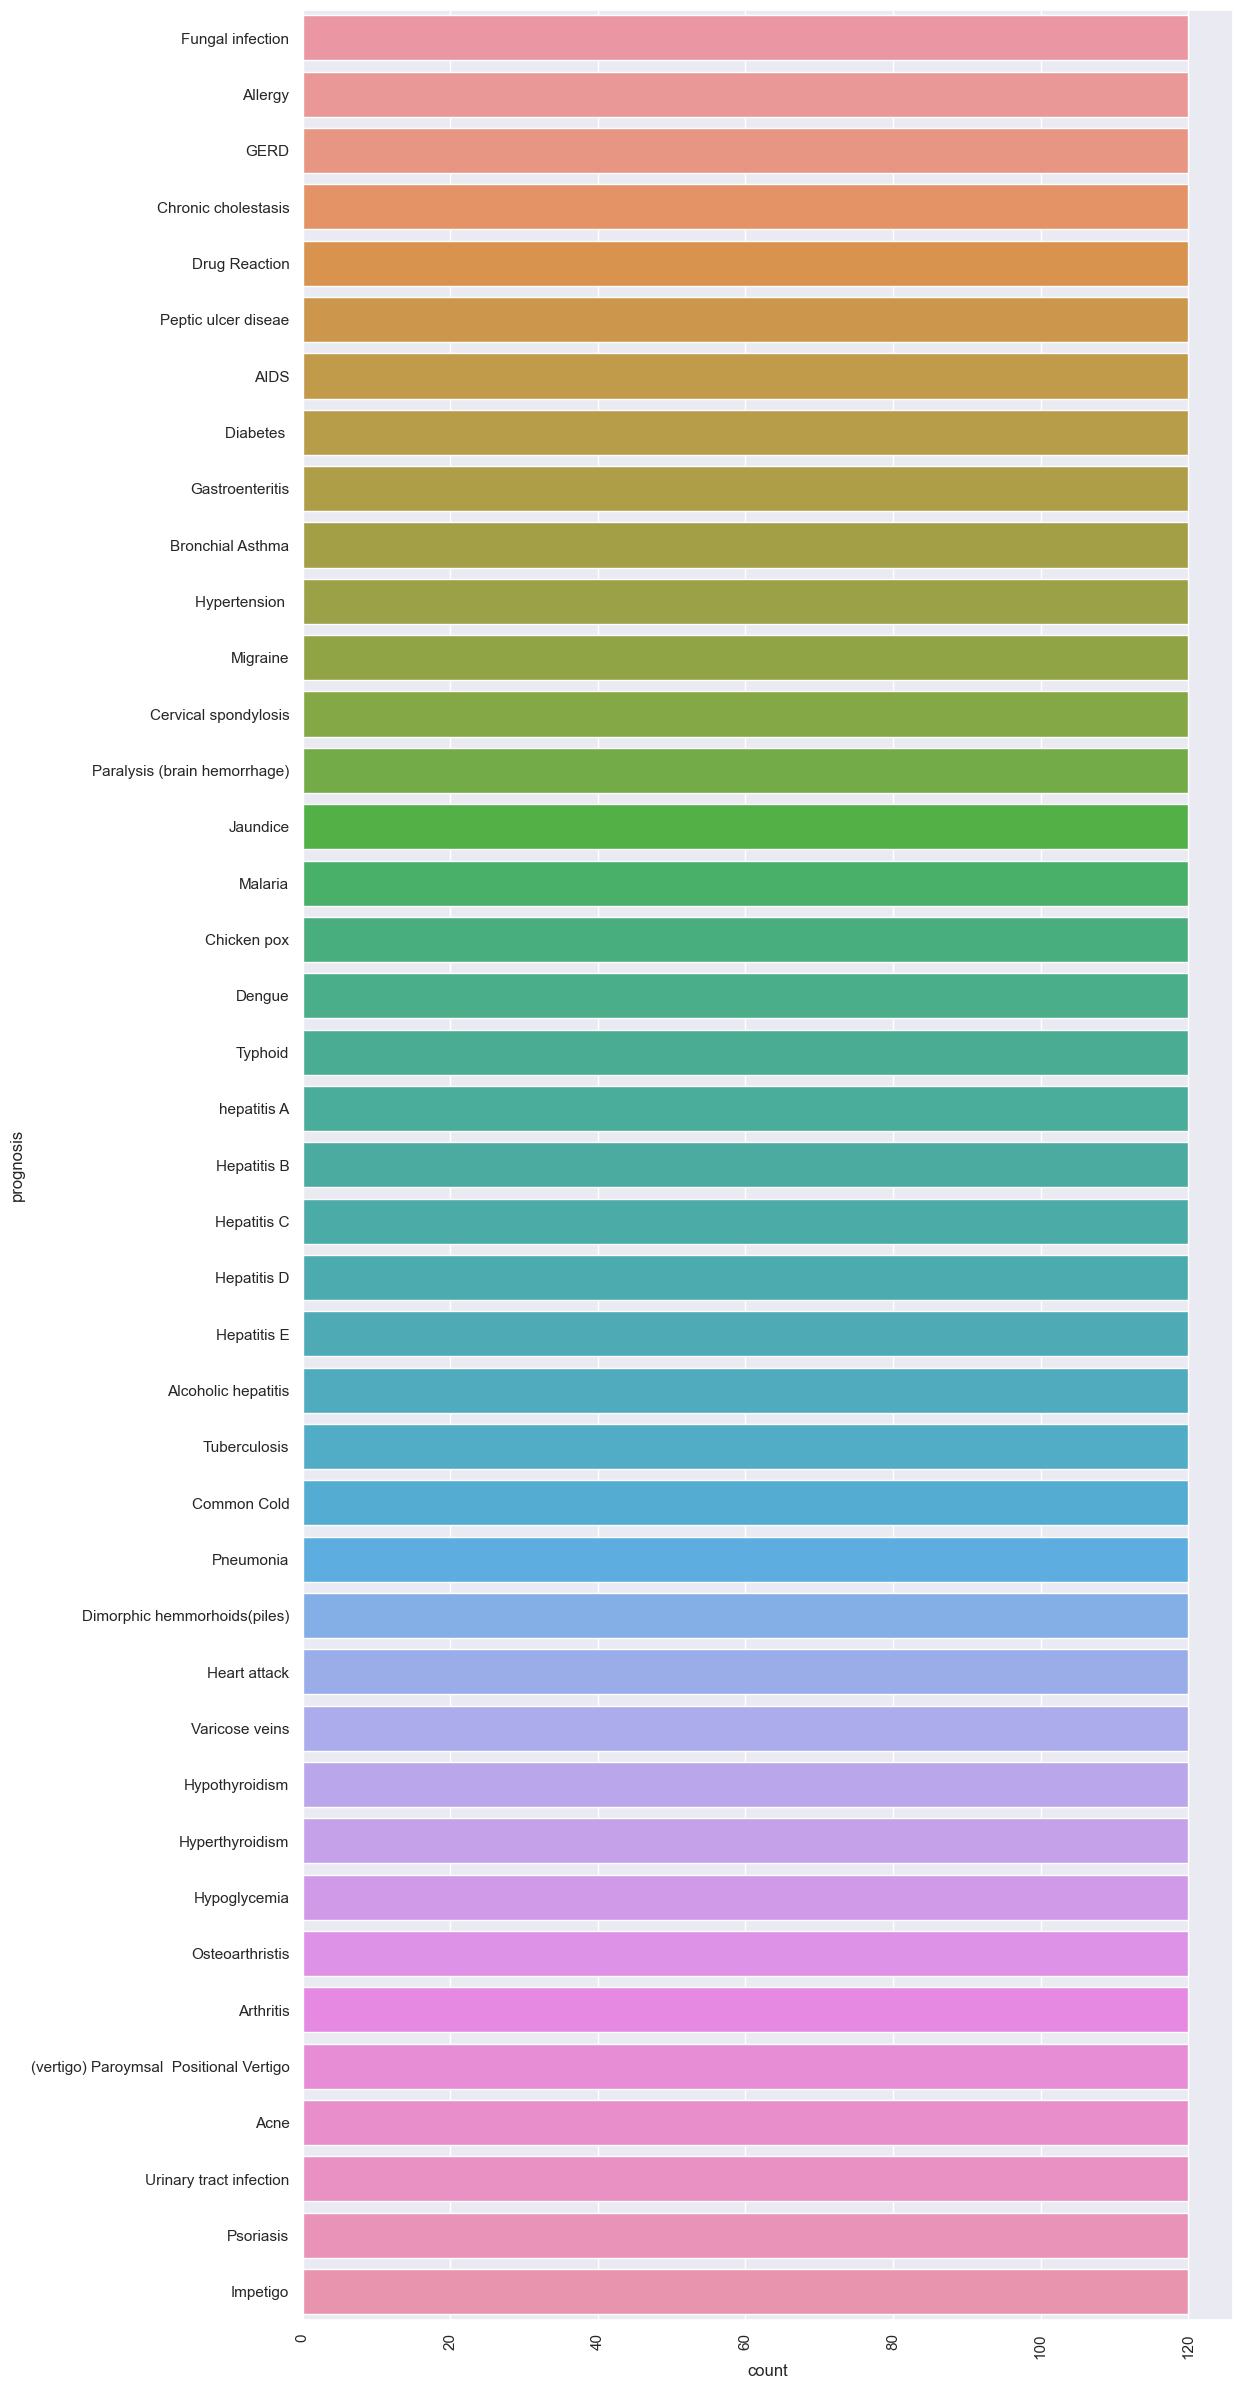

In [9]:
# the data is balanced for classification training. lets see value counts and also visualize them
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="prognosis", data=training_df)
print(training_df["prognosis"].value_counts())

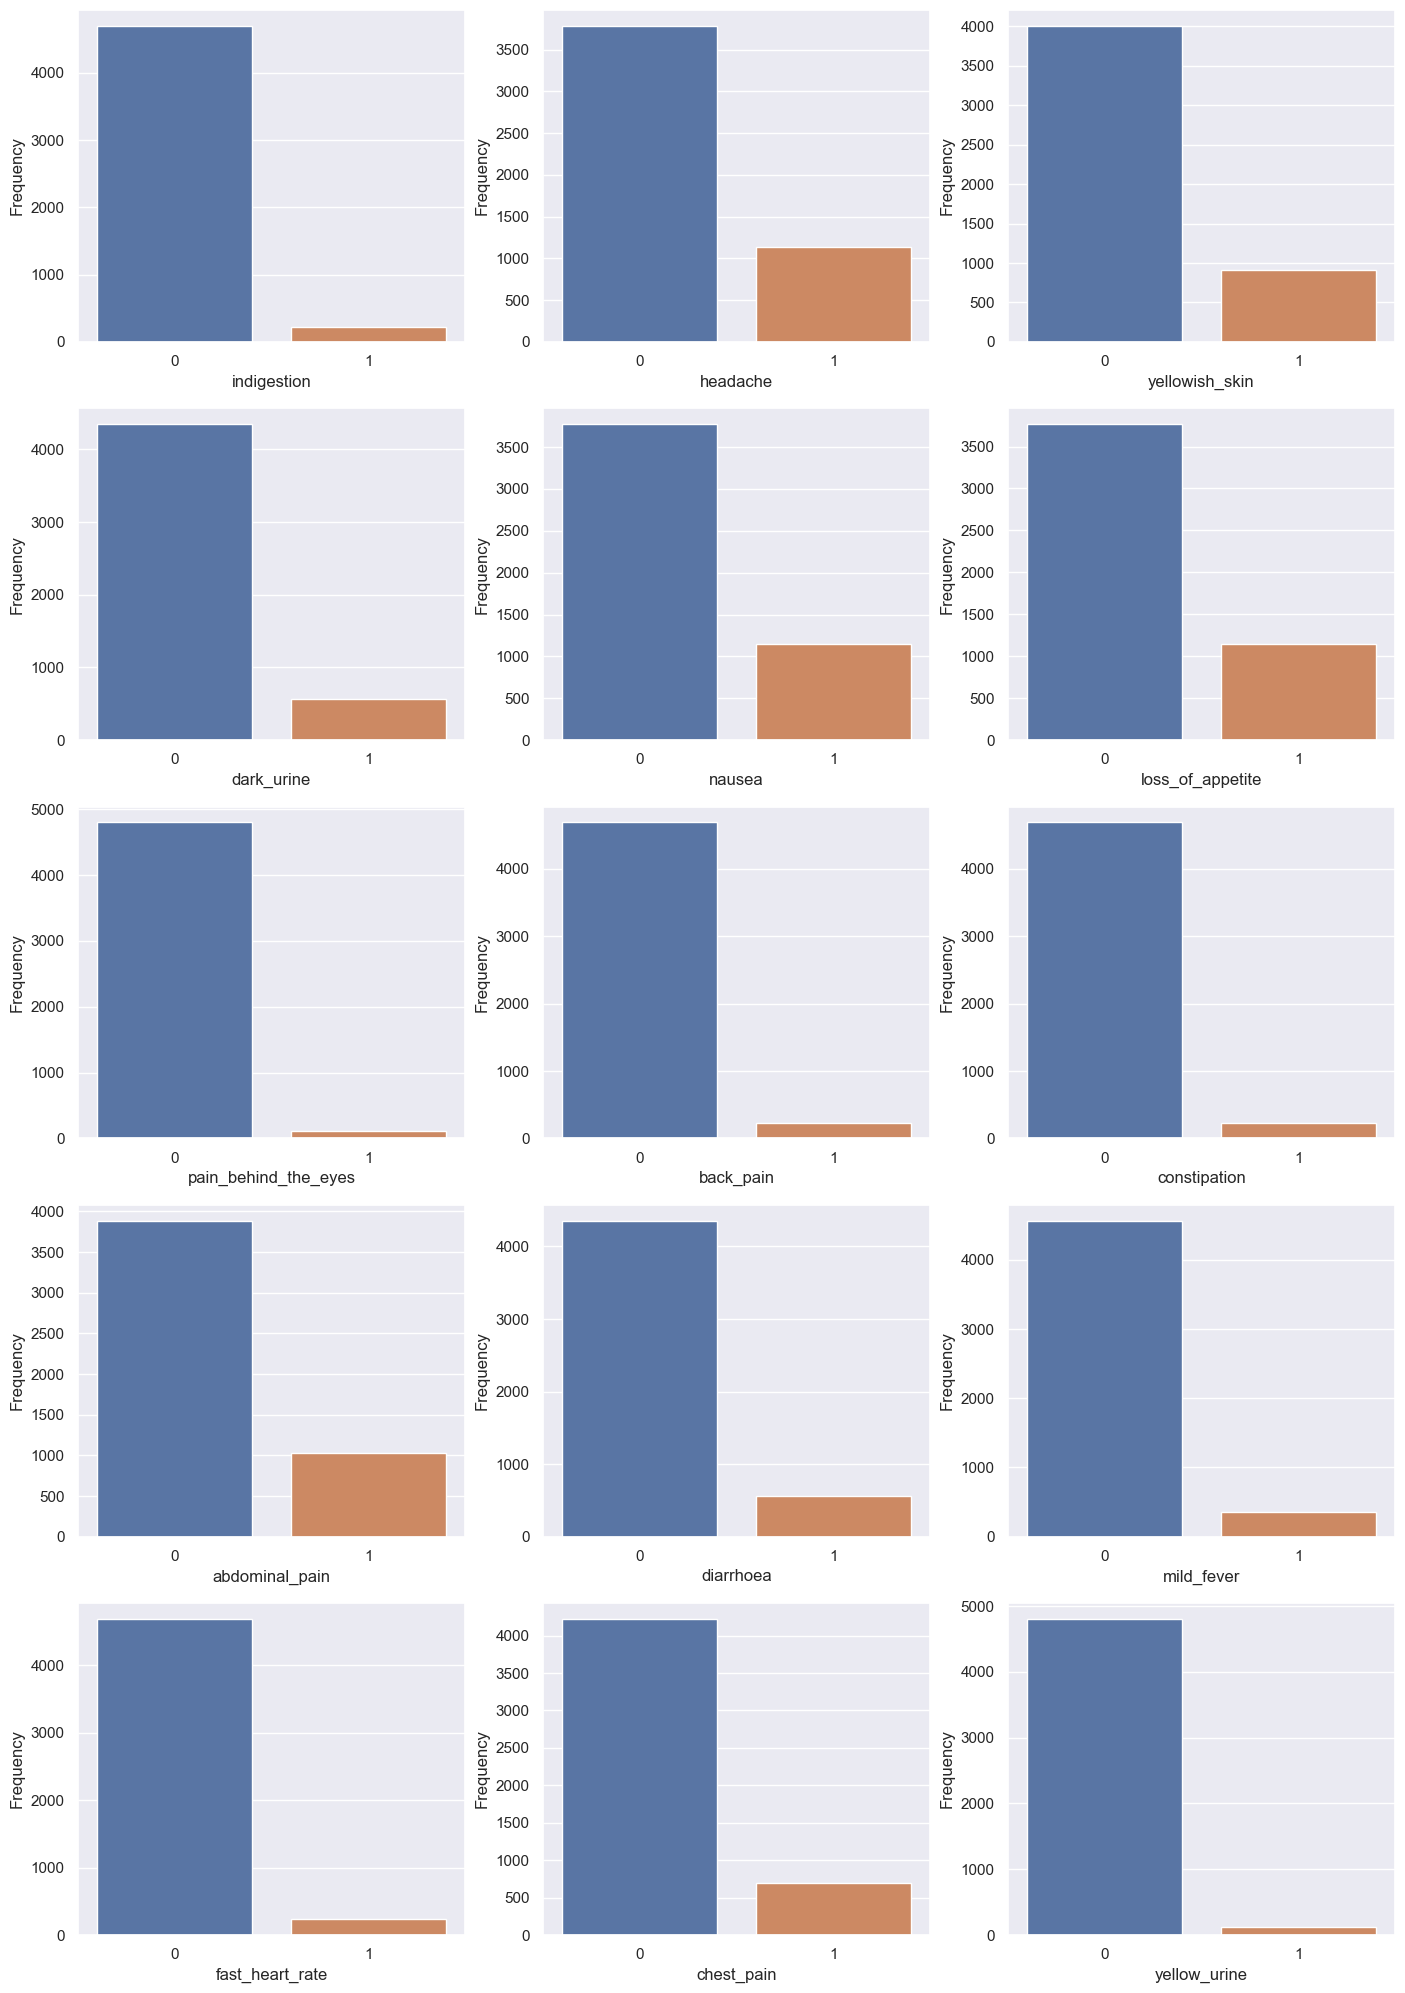

In [10]:
#lets visaulise some feature using seaborn 
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever','fast_heart_rate','chest_pain','yellow_urine']


plt.figure(figsize=(17, 25))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=feature, data=training_df)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()


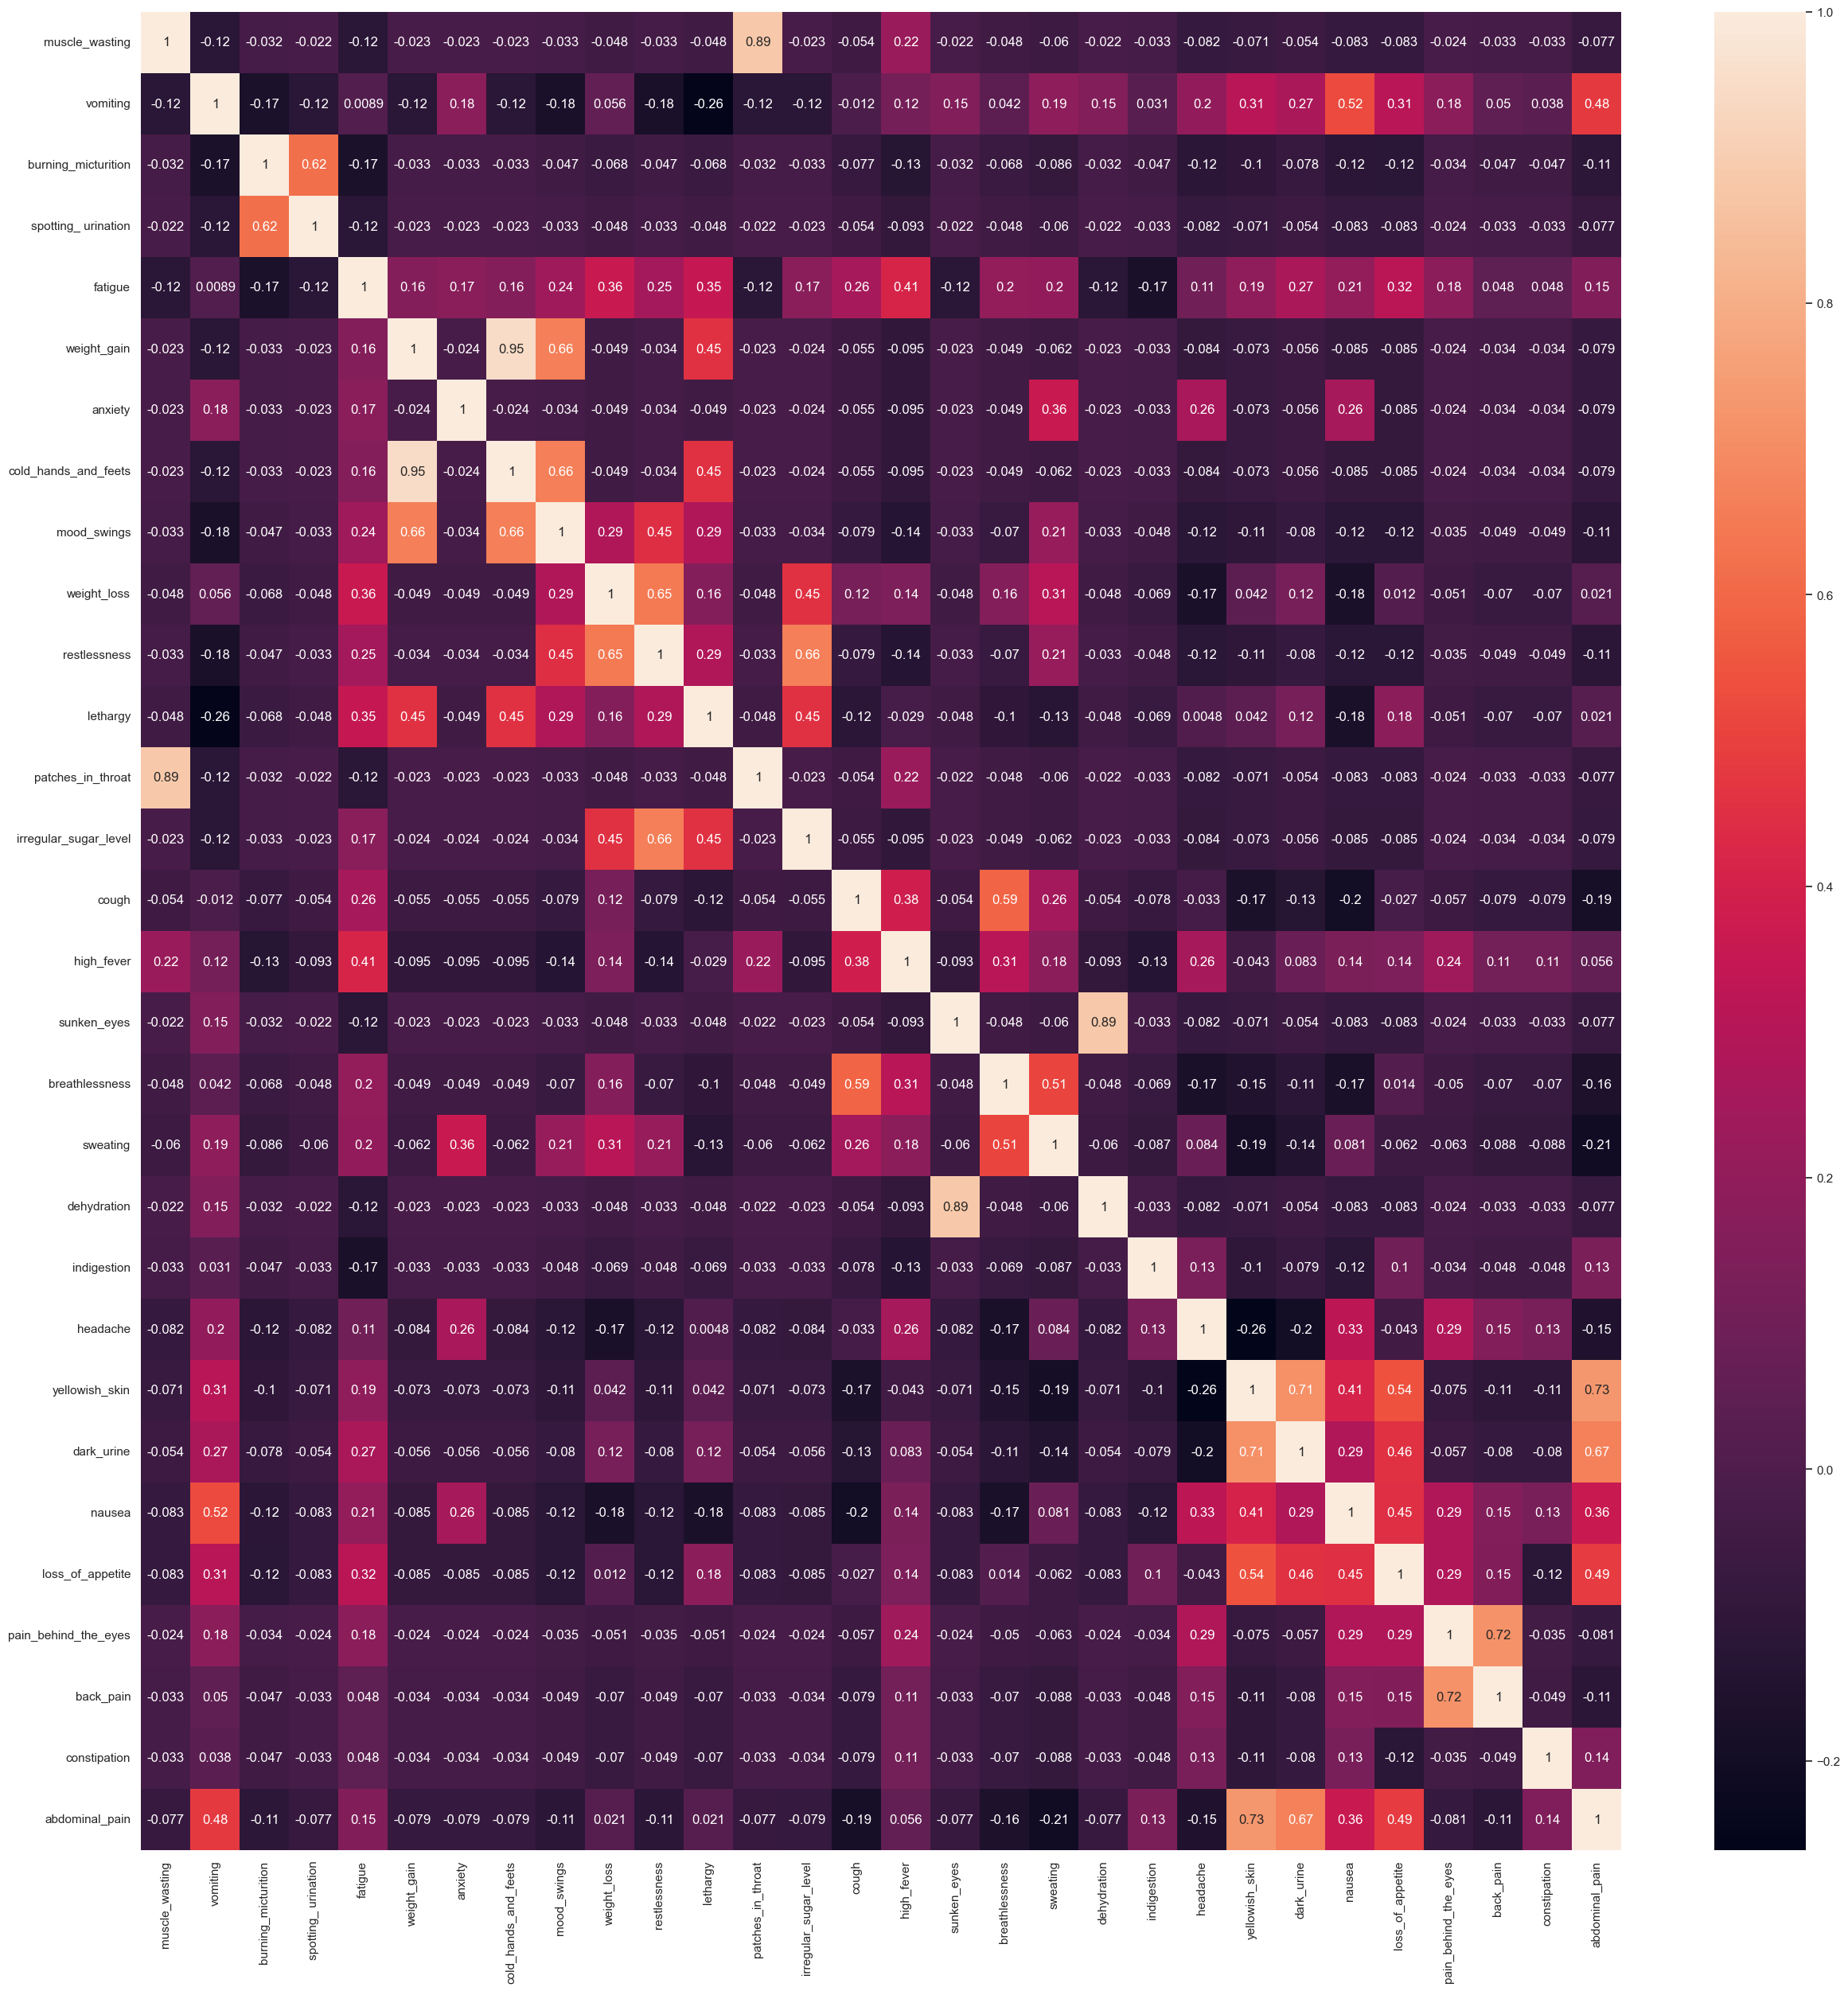

In [11]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = training_df.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

as we look at from correlation map, we can infer these:
* yellowish skin and abdominal pain have a high correlation coefficent which means these features usually seem together (maybe a liver problem)
* cough and breathlessness also have high correlation (it's usual because lung diseases give the same symptoms)
* restlessness and irregular sugar usually seem together

<a id = "2"></a>
#### Data Cleaning

In [12]:
# drop unnamed feature from train data
print(training_df["Unnamed: 133"])
training_df.drop("Unnamed: 133", axis = 1, inplace = True)
# train_df["Unnamed: 133"]  # it's not here anymore

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4915   NaN
4916   NaN
4917   NaN
4918   NaN
4919   NaN
Name: Unnamed: 133, Length: 4920, dtype: float64


In [13]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [14]:
training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


OK. Now let's create my ML models
<a id = "3"></a>
### KNN

In [15]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)  # k = 4
x_train, y_train = training_df.loc[:,training_df.columns != "prognosis"], training_df.loc[:,"prognosis"]
x_test, y_test = testing_df.loc[:,testing_df.columns != "prognosis"], testing_df.loc[:,"prognosis"]
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Prediction list: {}".format(prediction[0:30]))
print("With KNN (K=4) accuracy is: ",knn.score(x_test, y_test))

Prediction list: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack']
With KNN (K=4) accuracy is:  1.0


### <a id = "4"></a>
#### Model Complexity

In fact, this dataset doesnt requires tuning, but I want to try basics of complex modelling

In [16]:
from sklearn.model_selection import cross_val_score
neighbors = np.arange(1,30)   # for k tuning
train_accuracy = []
test_accuracy = []
cv_scores=[]
# Loop for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 30 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the knn
    knn.fit(x_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    # Compute cross-validation scores
    cv_score = cross_val_score(knn, x_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(cv_score.mean())


In [17]:
print(train_accuracy, end=" ")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

In [18]:
print(test_accuracy, end=" ")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

In [19]:
print(cv_scores, end=" ")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

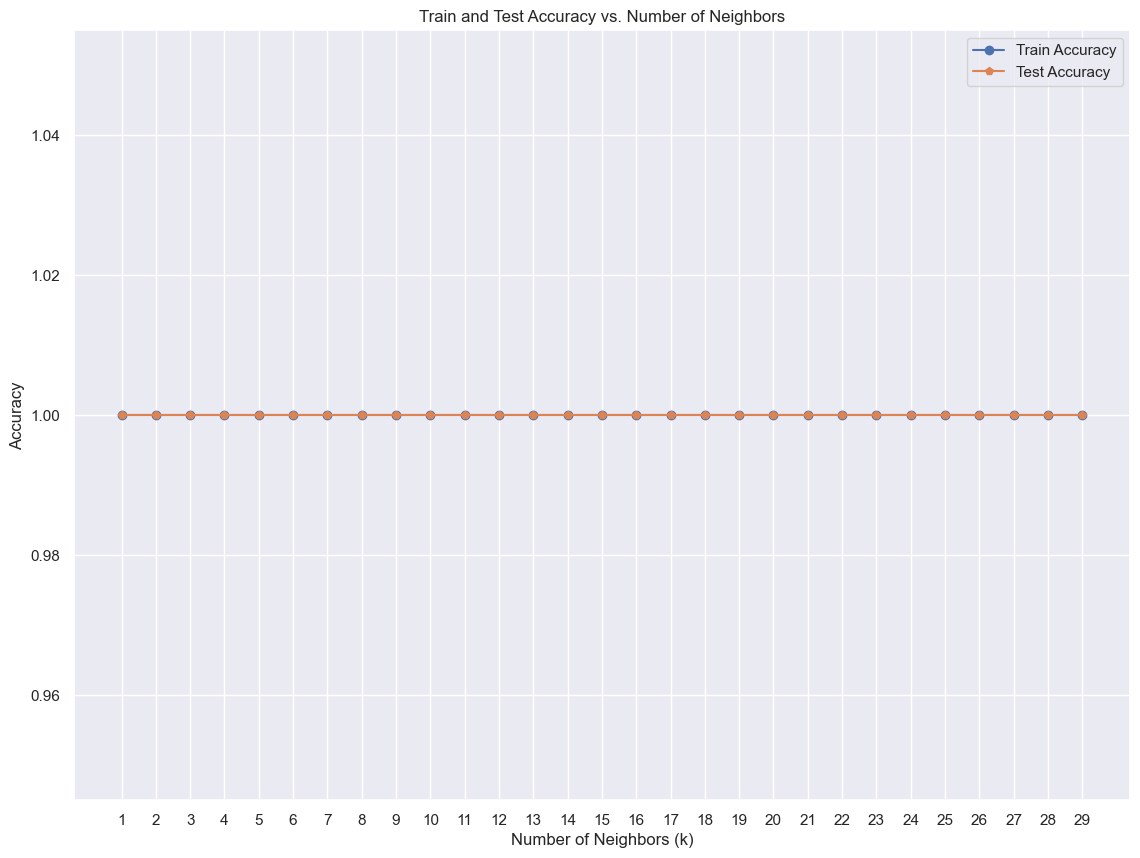

In [20]:
# plotting accuracy
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(neighbors, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(neighbors, test_accuracy, label='Test Accuracy', marker='p')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Neighbors')
plt.xticks(neighbors)
plt.legend()

<a id = "5"></a>
#### Cross Validation

In [21]:
print("CV scores: ", cv_scores)
print("CV scores average: ", np.sum(cv_scores)/len(cv_scores))

CV scores:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
CV scores average:  1.0


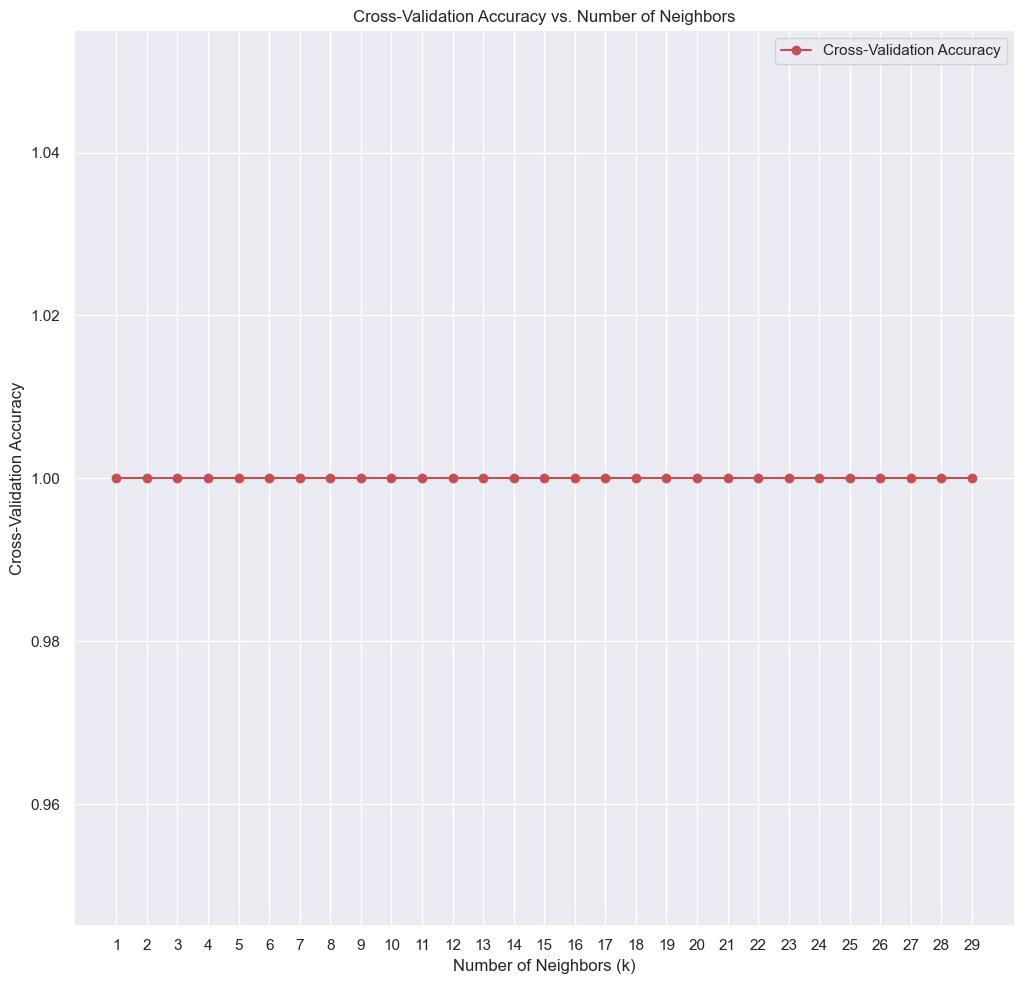

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.plot(neighbors, cv_scores, label='Cross-Validation Accuracy', marker='o', color='r')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs. Number of Neighbors')
plt.xticks(neighbors)  # Set x-ticks to be the k values
plt.legend()

plt.tight_layout()
plt.show()

<a id = "6"></a>
#### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)
dt.score(x_test, y_test)

0.9761904761904762

In [24]:
y_pred

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Hepatitis C'],
      dtype=object)

In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [26]:
#classification report : fi-score,recall etc
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
dt.fit(x_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [28]:
from sklearn.metrics import  accuracy_score
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9761904761904762


In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [30]:
scores = cross_val_score(dt, x_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


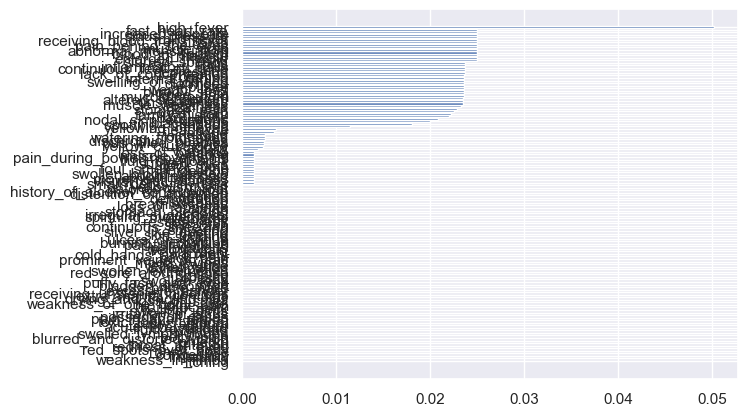

In [31]:
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), np.array(x_train.columns)[sorted_idx])
plt.show()

In [32]:
pruned_dt = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)  # Adjust ccp_alpha based on model
pruned_dt.fit(x_train, y_train)
pruned_dt.score(x_test, y_test)


0.9761904761904762

<a id = "7"></a>
#### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
rfc.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
y_pred=rfc.predict(x_test)
rfc.score(x_test, y_test)

0.9761904761904762

In [35]:
# Print classification report
print(classification_report(y_test, y_pred))


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [36]:
print(confusion_matrix(y_test, y_pred))


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [37]:

# Get feature importances
feature_importances = rfc.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features_df)


                 Feature  Importance
97           muscle_pain    0.019439
0                itching    0.016014
98     altered_sensorium    0.016001
33            dark_urine    0.015811
25            high_fever    0.015623
..                   ...         ...
18           mood_swings    0.001471
17  cold_hands_and_feets    0.001353
15           weight_gain    0.000966
70   puffy_face_and_eyes    0.000793
45        fluid_overload    0.000000

[132 rows x 2 columns]


In [38]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfc, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [42]:

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Train the model on the balanced data
rfc.fit(x_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

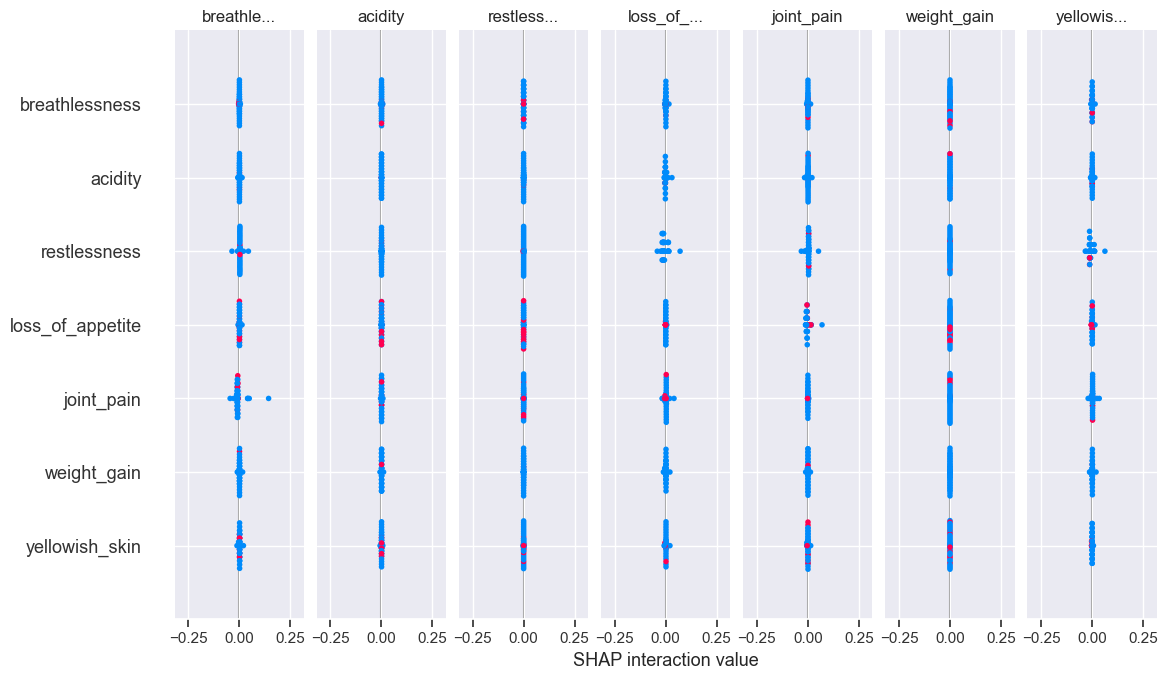

In [46]:
#Use tools like SHAP (SHapley Additive exPlanations) for interpreting the model’s predictions:
import shap

# Create the SHAP explainer
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

# Plot SHAP values
shap.summary_plot(shap_values, x_test)


<a id = "8"></a>
#### Support Vector Classifier

In [39]:
from sklearn.svm import SVC
svc = SVC(gamma = "auto", kernel = "rbf" )
svc.fit(x_train, y_train)
svc.predict(x_test)
svc.score(x_test, y_test)

1.0

Gaussian nb

In [1]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb = gnb.fit(df_x, np.ravel(df_y))

NameError: name 'df_x' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred,normalize=False))

In [ ]:
prediction=gnb.predict(x_test)
print(prediction[0:10])

<a id = "9"></a>
#### Logistic Regression Classifier

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(x_train, y_train)
logreg.predict(x_test)
logreg.score(x_test, y_test)

1.0

<a id = "10"></a>
#### Metrics

In [41]:
y_predictions = {"KNN": knn.predict(x_test),
          "SVC": svc.predict(x_test),
          "DT": dt.predict(x_test),
          "RFC": rfc.predict(x_test),
          "LOGREG": logreg.predict(x_test)}

from sklearn.metrics import classification_report, confusion_matrix

for classifier, y_pred in y_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(classifier,'Confusion matrix: \n',cm)
    print("------------------")
    print(classifier, 'Classification report: \n',classification_report(y_test,y_pred))

KNN Confusion matrix: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
------------------
KNN Classification report: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00        

<a id= "11"></a>
As we can see classification reports for each classifer, knn,svm and logistic regression's success score is 100% while decision tree and random forest's accuracies are approximately 98%.

#### THE END